In [2]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
#%config BackendInline.figure_format='svg'

plt.style.use(['seaborn-notebook',])
# plt.matplotlib.rcParams['figure.dpi'] = 120
# plt.matplotlib.rcParams['savefig.dpi'] = 120

# plt.matplotlib.rcParams['mathtext.fontset'] = 'stix'
# plt.matplotlib.rcParams['font.family'] = 'STIXGeneral'

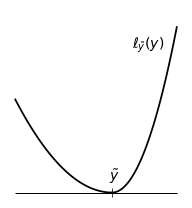

In [2]:
plt.figure(figsize=(3.0, 3.0))
range_x1 = np.linspace(-3., 0., 100)
range_x2 = np.linspace(0., 2., 100)
plt.hlines(0, -3, 2, color='k', linewidth=1.0)
plt.plot(range_x1, 0.25*range_x1**2, color='k', linestyle='-')
plt.plot(range_x2, range_x2**2, color='k', linestyle='-')
plt.xticks([0,], [r'$\tilde y$',])
# plt.vlines(0.75, 0., 0.75*0.75, linewidth=0.75, linestyle='--')
# plt.vlines(-1.5, 0., 0.25*1.5*1.5, linewidth=0.75, linestyle='--')
# plt.hlines(0.75*0.75, -1.5, 0.75, linewidth=0.75, linestyle='--')
# plt.hlines(0, -1.5, 0.75, linewidth=2.0)
plt.vlines(0, -0.1, 0.1, color='k', linewidth=0.75)
plt.yticks([], [])
ax = plt.gca()
ax.set_axis_off()
plt.text(-0.1, 0.3, r'$\tilde y$', {'size':14})
plt.text(0.6, 3.5, r'$\ell_{\tilde y}(y)$', {'size':14})
plt.ylim(-0.2, 4.5)
plt.tight_layout()
plt.savefig('fig/loss_func.eps')
plt.show()

In [18]:
def smin(z, u, eps=0.15):
    return 0.5 * (z + u - np.sqrt(eps**2 + (z-u)**2) )

def softmin(z, u, a=5):
    return (-1./a) * np.log(np.exp(-a*z) + np.exp(-a*u))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


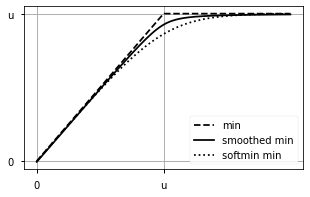

In [20]:
plt.figure(figsize=(5.0, 3.0))
xrange = np.array(np.linspace(0., 2., 200))
plt.plot(xrange, np.minimum(xrange, 1.), label='min', linestyle='--', color='k')
plt.plot(xrange, smin(xrange, 1.), label='smoothed min', linestyle='-', color='k')
plt.plot(xrange, softmin(xrange, 1.), label='softmin min', linestyle=':', color='k')
plt.xticks([0,1.],[0,"u"])
plt.yticks([0,1.],[0,"u"])
plt.legend()
plt.grid()
plt.savefig('fig/smoothed_min.eps')
plt.show()


In [71]:
def step(x, u, e=0.2):
    y = x - u
    return (1.0 - y/np.sqrt(y*y + e*e)) / 2.0

def step2(x, u, e=0.2):
    y = x - u
    v = np.sqrt(y*y + e*e)
#     return (y - v + e) / 2.0
    return (y - v ) / 2.0

def step3(x, u, e=0.2):
    y = x - u
    e2 = e*e
    v = np.sqrt(y*y + e*e)
#     return (y*(-v+e2+y)-e2*np.log(v+y)+e2*np.log(e))/4.
    return (y*(-v+y)-e2*np.log(v+y)-e2*np.log(e))/4


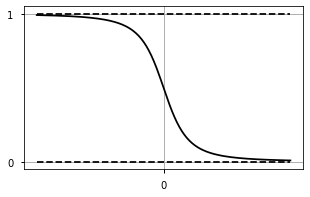

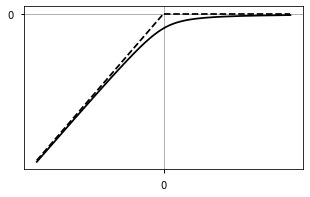

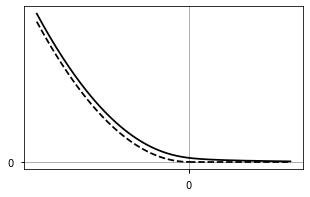

In [117]:
plt.figure(figsize=(5.0, 3.0))
xrange = np.array(np.linspace(-1., 1., 200))
plt.plot(xrange, step(xrange, 0), color='k')
plt.hlines(1, -1, 1, linestyle='--', color='k')
plt.hlines(0, -1, 1, linestyle='--', color='k')
plt.xticks([0],[0])
plt.yticks([0,1.],[0,1])
plt.grid()
plt.show()

plt.figure(figsize=(5.0, 3.0))
xrange = np.array(np.linspace(-1., 1., 200))
plt.plot(xrange, step2(xrange, 0), color='k')
plt.hlines(0, 0, 1, linestyle='--', color='k')
plt.plot([-1,0], [-1,0], linestyle='--', color='k')
plt.xticks([0],[0])
plt.yticks([0],[0])
plt.grid()
plt.show()

plt.figure(figsize=(5.0, 3.0))
xrange = np.array(np.linspace(-1.5, 1., 200))
xrange2 = np.array(np.linspace(-1.5, 0., 100))
plt.plot(xrange, step3(xrange, 0), color='k')
plt.plot(xrange2, (xrange2)**2/2, linestyle='--', color='k')
plt.hlines(0, 0, 1, linestyle='--', color='k')
plt.xticks([0.],[0])
plt.yticks([0],[0])
plt.grid()
plt.show()
